# Logistic Regression Algorithm
          

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('E:\Sankhyana Training\Datasets\HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
data.shape

(14999, 10)

## Select left data from the column

In [27]:
# count the occurrences of each unique value in the left column of the data DataFrame.
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [28]:
# spliting data in the left column,here we select the 1's values in the left column and store them in 'left' variable
left=data[data.left==1]
left.shape

(3571, 10)

## Select Retained data from the column

In [8]:
#spliting data in the left column,here we select the 0's values in the left column and store them in 'retained' variable
retained=data[data.left==0]
retained.shape

(11428, 10)

## Group Data on Left base value

In [29]:
#calculating the means for 0's and 1's Column
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Step 3: Exploratory data analysis


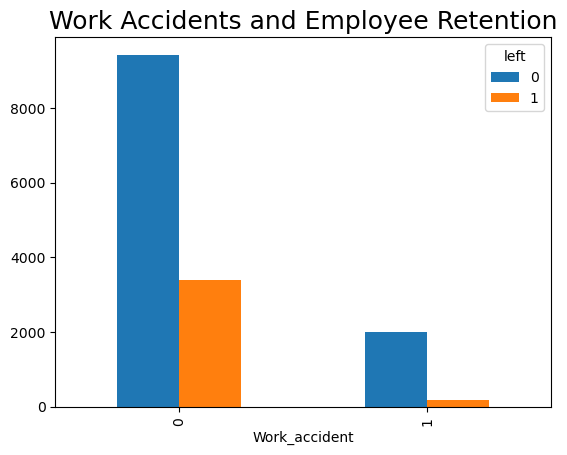

In [30]:
pd.crosstab(data.Work_accident,data.left).plot(kind='bar')
plt.title("Work Accidents and Employee Retention",fontsize=18);

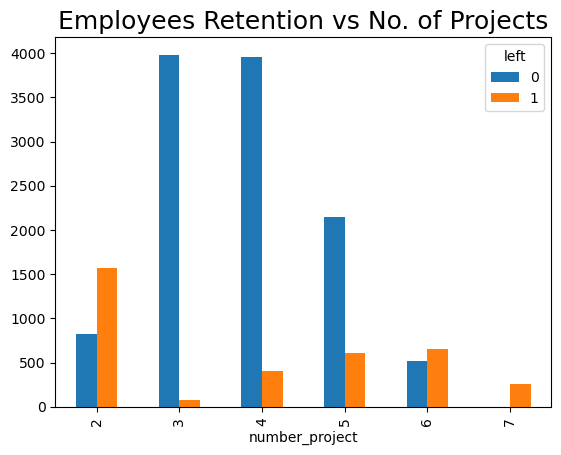

In [31]:
pd.crosstab(data.number_project,data.left).plot(kind='bar')
plt.title("Employees Retention vs No. of Projects",fontsize=18);

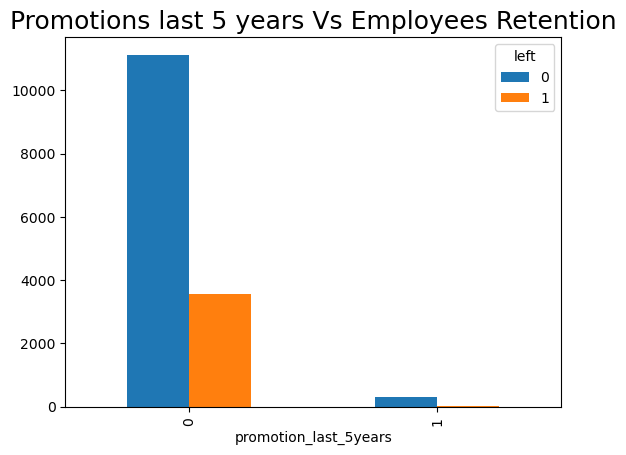

In [32]:
pd.crosstab(data.promotion_last_5years,data.left).plot(kind='bar')
plt.title("Promotions last 5 years Vs Employees Retention",fontsize=18);

### Bar Chart Showing Impact of Employees Salaries on Retention

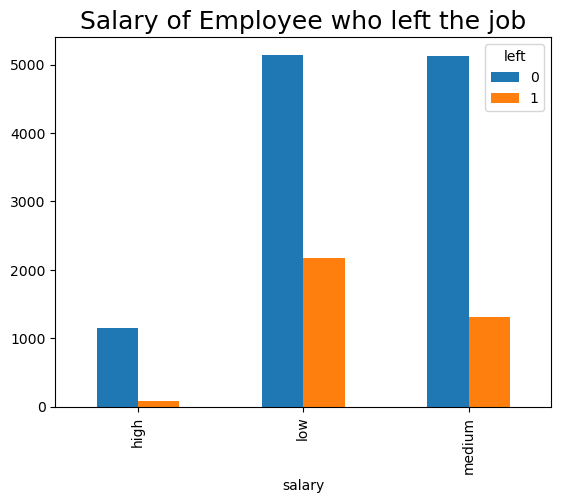

In [13]:
pd.crosstab(data.salary,data.left).plot(kind='bar')
plt.title("Salary of Employee who left the job",fontsize=18);

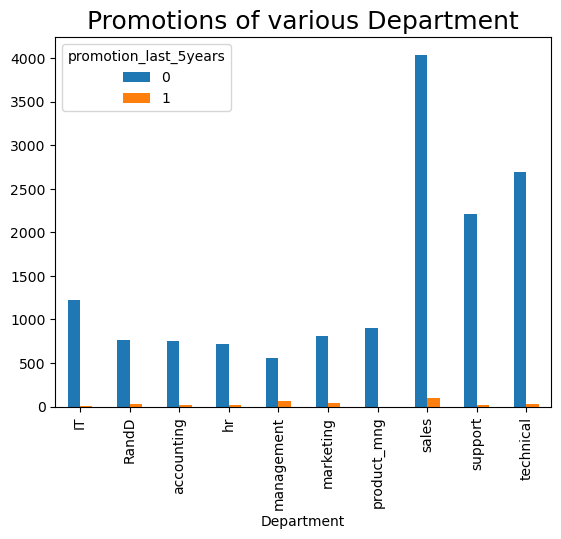

In [33]:
pd.crosstab(data.Department,data.promotion_last_5years).plot(kind='bar')
plt.title("Promotions of various Department",fontsize=18);

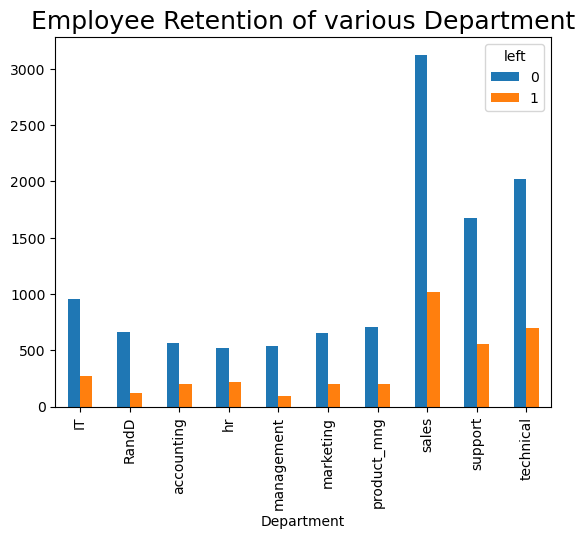

In [34]:
pd.crosstab(data.Department,data.left).plot(kind='bar')
plt.title("Employee Retention of various Department",fontsize=18);


## Building logistic regression model

###  Select Variables Which Most Impact on Employee Salary

In [16]:
sel_data = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sel_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


### Create Dummy Values of Salary Variable

In [35]:
dummies = pd.get_dummies(sel_data.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


### Concatenate selected Variables and dummy Variables

In [18]:
#sel_data and dummies data bot conccatenated
data_dummies = pd.concat([sel_data,dummies],axis='columns')
data_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


### Drop Salary Variable

In [19]:
data_dummies.drop('salary',axis='columns',inplace=True)
data_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


### Assign Data to X

In [20]:
# input variables
X = data_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


### Assign left Data to Y

In [36]:
Y= data.left
Y  # target variable

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

### Splitting into test set and training set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.3)

### Logistic Regression Model For Prediction

In [38]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression() 

### Train Model

In [39]:
model.fit(X_train, Y_train)

C:\Users\Alvine\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [40]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Score

In [26]:
# predicting the accuracy
model.score(X_test,Y_test)

0.7741904761904762

Therefore our Model can work with an accuracy of 77.5%

Hence we can use this model for Job Prediction (i.e we can predict whether an Employee will leave a job or not) with an accuracy of 77.5%